In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics

In [2]:
train=pd.read_csv("//Users//tanishqsharma//Downloads//Training Dataset.csv")
test=pd.read_csv("//Users//tanishqsharma//Downloads//Test Dataset.csv")

In [3]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
print(train.shape)
print(test.shape)

(614, 13)
(367, 12)


In [8]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [10]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

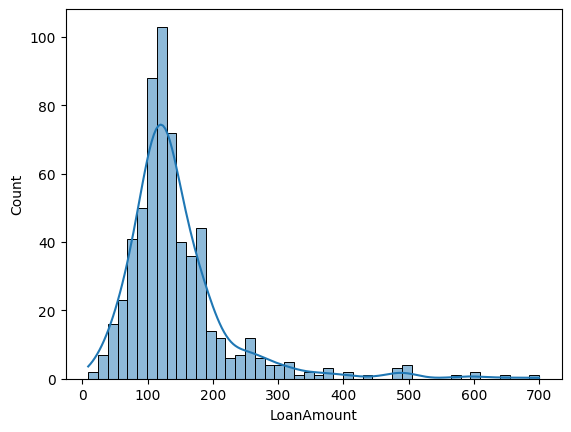

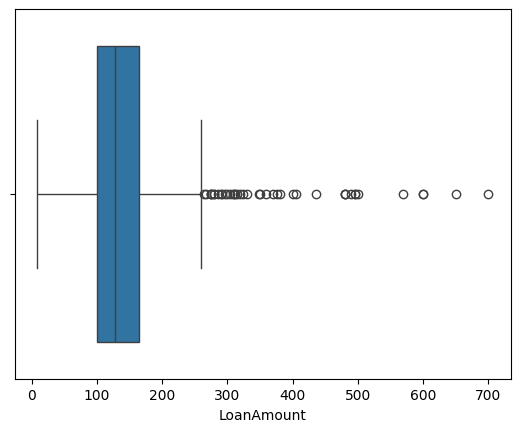

In [11]:
sns.histplot(x=train['LoanAmount'], kde=True)
plt.show()

sns.boxplot(x=train['LoanAmount'])
plt.show()

In [12]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].median(), inplace=True)

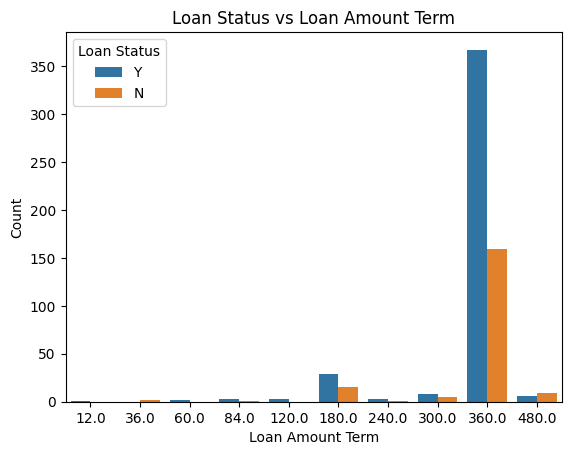

In [13]:
sns.countplot(x='Loan_Amount_Term', hue='Loan_Status', data=train)
plt.title('Loan Status vs Loan Amount Term')
plt.xlabel('Loan Amount Term')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.show()

In [14]:
train['Credit_History'].fillna(1.0, inplace=True)

In [15]:
train.groupby('Credit_History')['Loan_Status'].value_counts()

Credit_History  Loan_Status
0.0             N               82
                Y                7
1.0             Y              415
                N              110
Name: count, dtype: int64

In [16]:
train.groupby('Property_Area')['Loan_Status'].value_counts()

Property_Area  Loan_Status
Rural          Y              110
               N               69
Semiurban      Y              179
               N               54
Urban          Y              133
               N               69
Name: count, dtype: int64

In [17]:
from sklearn.preprocessing import LabelEncoder
numeric_cols = train.select_dtypes(include=['int64', 'float64']).columns
label_encoder = LabelEncoder()
for column in train.columns:
    if train[column].dtype == 'object':
        train[column] = label_encoder.fit_transform(train[column].astype(str))
print("\nEncoded DataFrame:")
print(train.head())


Encoded DataFrame:
   Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
0        0       1        0           0          0              0   
1        1       1        1           1          0              0   
2        2       1        1           0          0              1   
3        3       1        1           0          1              0   
4        4       1        0           0          0              0   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0       128.0             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History  Property_Area  Loan_Status  
0             1.0              2            1  
1             1.0              0          

In [18]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [19]:
numeric_cols_test = test.select_dtypes(include=['int64', 'float64']).columns
label_encoder = LabelEncoder()
for column in test.columns:
    if test[column].dtype == 'object':
        test[column] = label_encoder.fit_transform(test[column].astype(str))
print("\nEncoded DataFrame:")
print(test.head())


Encoded DataFrame:
   Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
0        0       1        1           0          0              0   
1        1       1        1           1          0              0   
2        2       1        1           2          0              0   
3        3       1        1           2          0              0   
4        4       1        0           0          1              0   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5720                  0       110.0             360.0   
1             3076               1500       126.0             360.0   
2             5000               1800       208.0             360.0   
3             2340               2546       100.0             360.0   
4             3276                  0        78.0             360.0   

   Credit_History  Property_Area  
0             1.0              2  
1             1.0              2  
2             1.0              2 

In [20]:
test.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [21]:
test['LoanAmount'].fillna(test['LoanAmount'].median(), inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].median(), inplace=True)
test['Credit_History'].fillna(test['Credit_History'].median(), inplace=True)

In [22]:
x = train.drop('Loan_Status', axis=1)
y = train['Loan_Status']

In [23]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [24]:
model = LogisticRegression()
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
print("Logistic Regression:")
print(f'Accuracy: {metrics.accuracy_score(ytest, ypred)}')
print("Classification Report:")
print(metrics.classification_report(ytest, ypred))
print("Confusion Matrix:")
print(metrics.confusion_matrix(ytest, ypred))

Logistic Regression:
Accuracy: 0.7804878048780488
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.40      0.56        43
           1       0.75      0.99      0.85        80

    accuracy                           0.78       123
   macro avg       0.85      0.69      0.71       123
weighted avg       0.82      0.78      0.75       123

Confusion Matrix:
[[17 26]
 [ 1 79]]


In [26]:
model_r=RandomForestClassifier(random_state=42)
model_r.fit(xtrain,ytrain)
ypred_r = model_r.predict(xtest)

In [27]:
print("Random Forest Classification:")
print(f'Accuracy: {metrics.accuracy_score(ytest, ypred_r)}')
print("Classification Report:")
print(metrics.classification_report(ytest, ypred_r))
print("Confusion Matrix:")
print(metrics.confusion_matrix(ytest, ypred_r))

Random Forest Classification:
Accuracy: 0.7804878048780488
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.42      0.57        43
           1       0.76      0.97      0.85        80

    accuracy                           0.78       123
   macro avg       0.83      0.70      0.71       123
weighted avg       0.81      0.78      0.75       123

Confusion Matrix:
[[18 25]
 [ 2 78]]


In [28]:
model_g=GradientBoostingClassifier()
model_g.fit(xtrain,ytrain)
ypred_g=model_g.predict(xtest)

In [29]:
print("Gradient Classification:")
print(f'Accuracy: {metrics.accuracy_score(ytest, ypred_g)}')
print("Classification Report:")
print(metrics.classification_report(ytest, ypred_g))
print("Confusion Matrix:")
print(metrics.confusion_matrix(ytest, ypred_g))

Gradient Classification:
Accuracy: 0.7642276422764228
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.42      0.55        43
           1       0.75      0.95      0.84        80

    accuracy                           0.76       123
   macro avg       0.79      0.68      0.70       123
weighted avg       0.78      0.76      0.74       123

Confusion Matrix:
[[18 25]
 [ 4 76]]


In [30]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,1,1,0,0,0,5720,0,110.0,360.0,1.0,2
1,1,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2
2,2,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2
3,3,1,1,2,0,0,2340,2546,100.0,360.0,1.0,2
4,4,1,0,0,1,0,3276,0,78.0,360.0,1.0,2


In [31]:
missing_cols = set(x.columns) - set(test.columns)
for col in missing_cols:
    test[col] = 0
test = test[x.columns]

In [32]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,1,1,0,0,0,5720,0,110.0,360.0,1.0,2
1,1,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2
2,2,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2
3,3,1,1,2,0,0,2340,2546,100.0,360.0,1.0,2
4,4,1,0,0,1,0,3276,0,78.0,360.0,1.0,2


In [33]:
test_predictions = model.predict(test)

In [34]:
submission = pd.DataFrame({
    'Loan_ID': test['Loan_ID'],
    'Loan_Status': test_predictions
})
submission['Loan_Status'] = submission['Loan_Status'].map({1: 'Y', 0: 'N'})
submission.to_csv('submission.csv', index=False)
submission.head()

,Loan_ID,Loan_Status
0,0,Y
1,1,Y
2,2,Y
3,3,Y
4,4,Y


In [35]:
print(test.shape)
print(submission.shape)

(367, 12)
(367, 2)
